<a href="https://colab.research.google.com/github/ayushiitbhu2800/Medium-Term-Load-Forecasting/blob/main/Medium_Term_Load_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Cloning the repository for Data Set

In [18]:
! git clone https://github.com/ayushiitbhu2800/Medium-Term-Load-Forecasting;

fatal: destination path 'Medium-Term-Load-Forecasting' already exists and is not an empty directory.


Reading the Data Set from the repository for further analysis

In [19]:
data_set_unformatted=pd.read_csv("/content/Medium-Term-Load-Forecasting/full_dataset.csv",index_col=None);

In [20]:
data_set_unformatted

,date,year,month,day,weekday,hour,demand,temperature,humd
0,01-01-2004 00:00,2004,1,1,5,0,14703,1.4,59.0
1,01-01-2004 01:00,2004,1,1,5,1,14130,1.4,64.0
2,01-01-2004 02:00,2004,1,1,5,2,13575,1.6,65.0
3,01-01-2004 03:00,2004,1,1,5,3,13280,2.0,64.0
4,01-01-2004 04:00,2004,1,1,5,4,13219,2.0,65.0
...,...,...,...,...,...,...,...,...,...
140251,31-12-2019 19:00,2019,12,31,3,19,15909,0.7,68.0
140252,31-12-2019 20:00,2019,12,31,3,20,15198,0.4,69.0
140253,31-12-2019 21:00,2019,12,31,3,21,14678,0.2,68.0
140254,31-12-2019 22:00,2019,12,31,3,22,14136,-0.1,69.0


In [21]:
data_set_unformatted=data_set_unformatted.rename(columns={"date":"Time"})
data_set_unformatted

,Time,year,month,day,weekday,hour,demand,temperature,humd
0,01-01-2004 00:00,2004,1,1,5,0,14703,1.4,59.0
1,01-01-2004 01:00,2004,1,1,5,1,14130,1.4,64.0
2,01-01-2004 02:00,2004,1,1,5,2,13575,1.6,65.0
3,01-01-2004 03:00,2004,1,1,5,3,13280,2.0,64.0
4,01-01-2004 04:00,2004,1,1,5,4,13219,2.0,65.0
...,...,...,...,...,...,...,...,...,...
140251,31-12-2019 19:00,2019,12,31,3,19,15909,0.7,68.0
140252,31-12-2019 20:00,2019,12,31,3,20,15198,0.4,69.0
140253,31-12-2019 21:00,2019,12,31,3,21,14678,0.2,68.0
140254,31-12-2019 22:00,2019,12,31,3,22,14136,-0.1,69.0


In [22]:
data_set_unformatted

,Time,year,month,day,weekday,hour,demand,temperature,humd
0,01-01-2004 00:00,2004,1,1,5,0,14703,1.4,59.0
1,01-01-2004 01:00,2004,1,1,5,1,14130,1.4,64.0
2,01-01-2004 02:00,2004,1,1,5,2,13575,1.6,65.0
3,01-01-2004 03:00,2004,1,1,5,3,13280,2.0,64.0
4,01-01-2004 04:00,2004,1,1,5,4,13219,2.0,65.0
...,...,...,...,...,...,...,...,...,...
140251,31-12-2019 19:00,2019,12,31,3,19,15909,0.7,68.0
140252,31-12-2019 20:00,2019,12,31,3,20,15198,0.4,69.0
140253,31-12-2019 21:00,2019,12,31,3,21,14678,0.2,68.0
140254,31-12-2019 22:00,2019,12,31,3,22,14136,-0.1,69.0


In [23]:
data_set_unformatted["Time"]=pd.to_datetime(data_set_unformatted[['year','month','day','hour']]);

In [24]:
data_set_unformatted

,Time,year,month,day,weekday,hour,demand,temperature,humd
0,2004-01-01 00:00:00,2004,1,1,5,0,14703,1.4,59.0
1,2004-01-01 01:00:00,2004,1,1,5,1,14130,1.4,64.0
2,2004-01-01 02:00:00,2004,1,1,5,2,13575,1.6,65.0
3,2004-01-01 03:00:00,2004,1,1,5,3,13280,2.0,64.0
4,2004-01-01 04:00:00,2004,1,1,5,4,13219,2.0,65.0
...,...,...,...,...,...,...,...,...,...
140251,2019-12-31 19:00:00,2019,12,31,3,19,15909,0.7,68.0
140252,2019-12-31 20:00:00,2019,12,31,3,20,15198,0.4,69.0
140253,2019-12-31 21:00:00,2019,12,31,3,21,14678,0.2,68.0
140254,2019-12-31 22:00:00,2019,12,31,3,22,14136,-0.1,69.0


In [25]:
data_set_unformatted=data_set_unformatted.set_index("Time");

In [26]:
data_set_unformatted

,year,month,day,weekday,hour,demand,temperature,humd
Time,,,,,,,,
2004-01-01 00:00:00,2004,1,1,5,0,14703,1.4,59.0
2004-01-01 01:00:00,2004,1,1,5,1,14130,1.4,64.0
2004-01-01 02:00:00,2004,1,1,5,2,13575,1.6,65.0
2004-01-01 03:00:00,2004,1,1,5,3,13280,2.0,64.0
2004-01-01 04:00:00,2004,1,1,5,4,13219,2.0,65.0
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019,12,31,3,19,15909,0.7,68.0
2019-12-31 20:00:00,2019,12,31,3,20,15198,0.4,69.0
2019-12-31 21:00:00,2019,12,31,3,21,14678,0.2,68.0


We can now drop the year, month, day weekday, hour column as they are of no significance to us now. 

In [27]:
drop_cols=["year","month","day","hour"];
df=data_set_unformatted.drop(drop_cols,axis=1);

We have our final dataframe as follows denoted by "df"

In [28]:
df=df.rename(columns={"weekday":"Weekday","time":"Time","demand":"Demand","temperature":"Temperature","humd":"Humidity"});

In [29]:
df

,Weekday,Demand,Temperature,Humidity
Time,,,,
2004-01-01 00:00:00,5,14703,1.4,59.0
2004-01-01 01:00:00,5,14130,1.4,64.0
2004-01-01 02:00:00,5,13575,1.6,65.0
2004-01-01 03:00:00,5,13280,2.0,64.0
2004-01-01 04:00:00,5,13219,2.0,65.0
...,...,...,...,...
2019-12-31 19:00:00,3,15909,0.7,68.0
2019-12-31 20:00:00,3,15198,0.4,69.0
2019-12-31 21:00:00,3,14678,0.2,68.0


Data Set Cleaning

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2004-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Weekday      140256 non-null  int64  
 1   Demand       140256 non-null  int64  
 2   Temperature  139422 non-null  float64
 3   Humidity     139423 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.4 MB


In [31]:
print("There should be total {0} entries in the Temperature and Humidity columns".format(((2019-2004+1)*365+4)*24));

There should be total 140256 entries in the Temperature and Humidity columns


Here we can clearly notice that some of the cells in Temperature and Humidity are missing while all of them are present in Demand column

There are many methods to fill in these null values:

1.   Interpolation
2.   Frequency method
3.   Backfill(row-wise, column-wise)
4.   Frontfill(row-wise, column-wise)



Here we will proceed by using backfill row-wise method which is inbuilt in pandas it replaces the null values by the values in the next row.

In [33]:
df["Temperature"]=df["Temperature"].bfill();
df["Humidity"]=df["Humidity"].bfill();

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2004-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Weekday      140256 non-null  int64  
 1   Demand       140256 non-null  int64  
 2   Temperature  140256 non-null  float64
 3   Humidity     140256 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.4 MB


In [35]:
df["Temperature"]=(df["Temperature"]*9)/5+32;
df["Humidity"]=df["Humidity"]/100;

In [36]:
df['sin_hour'] = np.sin(2*np.pi*df.index.hour.values/24)
df['cos_hour'] = np.cos(2*np.pi*df.index.hour.values/24)

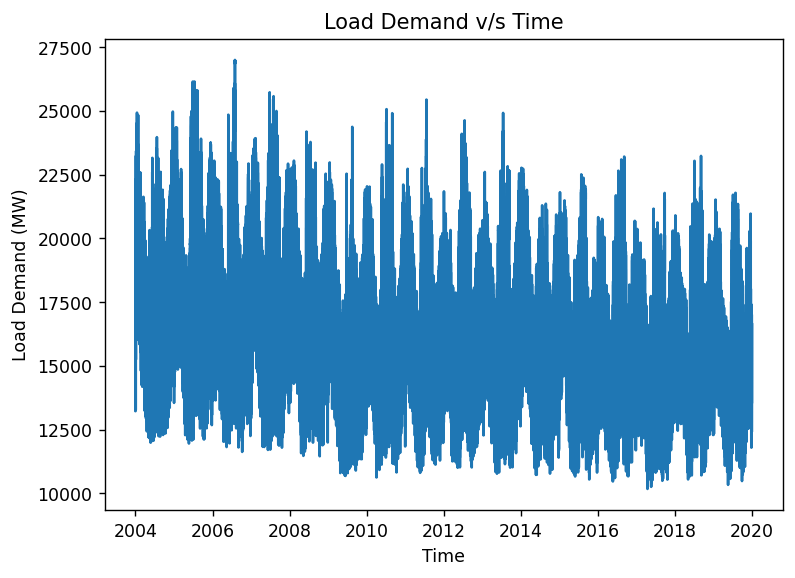

<Figure size 2500x1500 with 0 Axes>

In [48]:
plt.plot(df["Demand"])
plt.xlabel("Time");
plt.ylabel("Load Demand (MW)");
plt.title("Load Demand v/s Time");
plt.figure(figsize=(20,12));

Feature scaling is used to bring all values into the range [0,1]. This is also called unity-based normalization. This can be generalized to restrict the range of values in the dataset between any arbitrary points **a** and **b**.
We normalize our data of Load and Temperature using Min-Max Scaler.

In [53]:
scaler=MinMaxScaler()
df_norm=df.copy()
df_norm[["Temperature","Demand"]]=scaler.fit_transform(df_norm[["Temperature","Demand"]])

In [54]:
df_norm

,Weekday,Demand,Temperature,Humidity,sin_hour,cos_hour
Time,,,,,,
2004-01-01 00:00:00,5,0.269391,0.423077,0.59,0.000000,1.000000
2004-01-01 01:00:00,5,0.235360,0.423077,0.64,0.258819,0.965926
2004-01-01 02:00:00,5,0.202399,0.426282,0.65,0.500000,0.866025
2004-01-01 03:00:00,5,0.184879,0.432692,0.64,0.707107,0.707107
2004-01-01 04:00:00,5,0.181257,0.432692,0.65,0.866025,0.500000
...,...,...,...,...,...,...
2019-12-31 19:00:00,3,0.341014,0.411859,0.68,-0.965926,0.258819
2019-12-31 20:00:00,3,0.298788,0.407051,0.69,-0.866025,0.500000
2019-12-31 21:00:00,3,0.267906,0.403846,0.68,-0.707107,0.707107
